# Multimessenger Package Refactor Tests

Last updated: 17/04/2023

In [17]:
import cutax, straxen
import numpy as np
import astropy.units as u
from snewpy.neutrino import Flavor
from multimessenger.supernova import Supernova_Models
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Could not import editors, GUI not available.


In [2]:
# plt.style.use('/home/melih/software/multimessenger/multimessenger/supernova/customstyle.mplstyle')

If you are not on midway, and do not have access to common folder where we already stored some processed data and simulations, you can create a local `mma_data` folder and create a local config with the cell below.

In [3]:
# import configparser
# config = configparser.ConfigParser()
# config['paths'] = {'snewpy_models': './mma_data/SNEWPY_models/',
#                    'processed_data': './mma_data/',}
# config['wfsim'] = {'instruction_path': './mma_data/',
#                    'sim_folder': './mma_data/',}
# with open('./mma_data/temp_config.config', 'w') as configfile:
#     config.write(configfile)

I manually created a folder called `mma_data` and inside it I called <br>
`python -c 'import snewpy; snewpy.get_models()'` <br>
and installed 2 snewpy models. They are saved in `mma_data/SNEWPY_models/` which we give to config file. <br>

I store everything else in the same folder for now. Notice, normally, you don't want to keep (especially) heavy files in your home folder. The ideal would be to store all in the common /dali/ storage where everyone can load the same file instead of everyone creating it for themselves.

In [4]:
# create nakazato model 
# SN_Nakazato = Supernova_Models.Models("Nakazato_2013", config_file="./mma_data/temp_config.config")  # if on local
SN_Nakazato = Supernova_Models.Models("Nakazato_2013", config_file="../simple_config.conf")            # if on dali
# call the model by filename or index
SN_Nakazato(index=5) # brings the attributes

> Nakazato_2013 is created, load a progenitor by function call.
> You chose ~wisely~ ->	   [5]	nakazato-shen-z0.004-t_rev200ms-s50.0.fits
>>>>> Nakazato_2013-nakazato-shen-z0_004-t_rev200ms-s50_0_fits.pickle
> Retrieving object self.storageNakazato_2013-nakazato-shen-z0_004-t_rev200ms-s50_0_fits.pickle


/home/melih/software/multimessenger/multimessenger/supernova/snewpy_models.py:84: FutureWarning: Initializing this model with a filename is deprecated. Instead, use keyword arguments ['progenitor_mass', 'revival_time', 'metallicity', 'eos']. See `Nakazato_2013.param`, `Nakazato_2013.get_param_combinations()` for more info.
  models_dict[self.name](f)
/home/melih/software/multimessenger/multimessenger/supernova/snewpy_models.py:66: FutureWarning: Initializing this model with a filename is deprecated. Instead, use keyword arguments ['progenitor_mass', 'revival_time', 'metallicity', 'eos']. See `Nakazato_2013.param`, `Nakazato_2013.get_param_combinations()` for more info.
  model = models_dict[self.name](file_to_load, **model_kwargs)


In [5]:
# alternativley you can change them on the fly
SN_Nakazato.compute_model_fluxes(neutrino_energies=np.linspace(0, 150, 200), force=0)
fluxes_at10 = SN_Nakazato.scale_fluxes(distance=10)

Fluxes already exist in `self.fluxes`, and force=False, doing nothing.


In [6]:
print(f"The processed data will be saved here: {SN_Nakazato.storage}")

The processed data will be saved here: /project2/lgrandi/xenonnt/simulations/supernova/proc_snmodels/


In [10]:
from multimessenger.supernova.sn_utils import see_repos, display_config, see_simulated_files, see_simulated_contexts
display_config(config_file="../simple_config.conf")         # see the configuration
simnames = see_simulated_files(config_file="../simple_config.conf", get_names=True)

       paths        
snewpy_models
processed_data
imgs
data
outputs
---------------
       wfsim        
instruction_path
sim_folder
logs
---------------


In [18]:
# see_repos() #config_file="../simple_config.conf"            # see everything that we stored
see_simulated_contexts().tail()

,name,strax_version,cutax_version,straxen_version,date_added,tag,hash,sim_id
33,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_010
34,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_011
35,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_012
36,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_013
37,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,SN_Nakazato5_001


In [13]:
from multimessenger.supernova.Nucleus import Target
from multimessenger.supernova.Xenon_Atom import ATOM_TABLE
from multimessenger.supernova.interactions import Interactions

In [14]:
Int = Interactions(SN_Nakazato, Nuclei='Xenon', isotope='mix')

> Saved at <self.storage>/Nakazato_2013-nakazato-shen-z0_004-t_rev200ms-s50_0_fits_interaction.pickle!



In [15]:
Int.compute_interaction_rates()

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


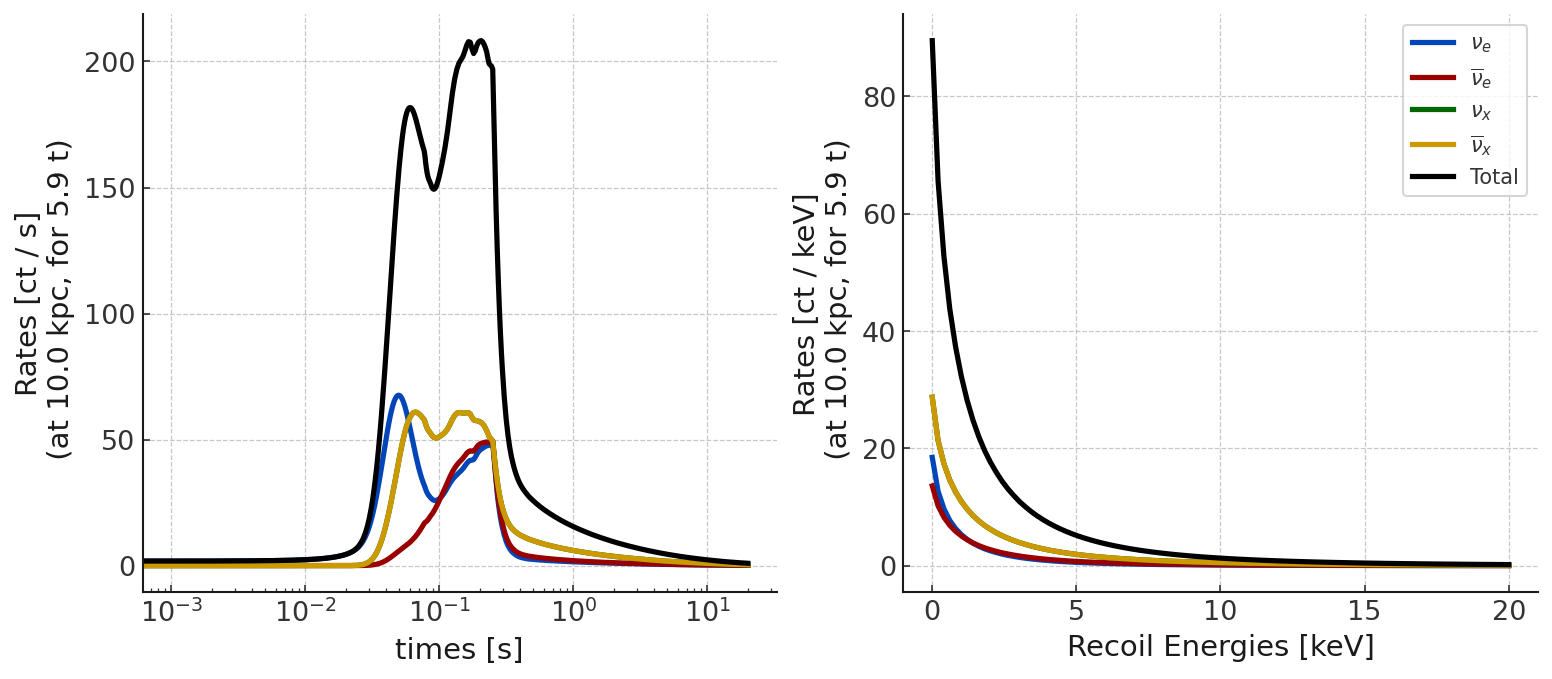

In [16]:
Int.scale_rates(distance=10, volume=5.9);
Int.plot_rates(scaled=True)

# Simulations

There are some functions to sample data and call simulations. I made a method of the class `simulate_automatically()` which does what it says.

The cell below simulates 1 SN realization from your `Int` and saves the instructions, simulated data in the folders according to your configuration file.

In [20]:
st, instructions = Int.simulate_automatically(runid="Naka16_i5_b0_015", return_instructions=True)

**Notice** <br>

`Int.simulate_automatically(runid="SN_Nakazato5_001", return_instructions=True)` <br>
uses the default context which is `cutax.contexts.xenonnt_sim_SR0v4_cmt_v9(output_folder='<sn_sims>')` <br>
By default the created context adds the supernova simulation storage, so all the simulated data is available. <br>
if you like to another just pass that context
```python
st = cutax.contexts.xenonnt_sim_SR0v4_cmt_v9(output_folder="/project2/lgrandi/xenonnt/simulations/supernova/strax_data/")
st = Int.simulate_automatically(context=st, runid="SN_Nakazato5_001")
```

If you don't specify the output folder, the common simulated folder will still be added to context but your simulations will likely be stored in your current folder and not accessible for others. <br>
The storage is written in the config `config["wfsim"]["sim_folder"]+"/strax_data"` <br>

Another alternative is to let the package do this adding, see below.

In [ ]:
# print(st.storage)
# from multimessenger.supernova.sn_utils import add_strax_folder
# add_strax_folder(SN_Nakazato.config, st)
# print(st.storage)

In [21]:
# strax_data_path = SN_Nakazato.config['wfsim']['sim_folder']
# import os 
# p = os.path.join(strax_data_path, "strax_data")
# st = cutax.contexts.xenonnt_sim_SR0v4_cmt_v9(output_folder=p)

In [25]:
peaks = st.get_df("Naka16_i5_b0_015", ["peak_basics", "peak_positions"])

Loading plugins: |          | 0.00 % [00:00<?]

In [26]:
peaks.sample(3)

,time,endtime,center_time,area,n_hits,n_channels,max_pmt,max_pmt_area,n_saturated_channels,range_50p_area,...,tight_coincidence,type,x_cnn,y_cnn,x_mlp,y_mlp,x_gcn,y_gcn,x,y
119,5521016560,5521048400,5521034322,622.459412,430,210,95,78.593117,0,7186.583984,...,17,2,-20.981518,-3.454873,-21.437607,-3.809468,-20.786213,-3.672337,-21.437607,-3.809468
97,2225113760,2225114080,2225113850,8.274369,6,6,472,2.006329,0,52.917915,...,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,4970346320,4970346620,4970346399,1.476563,2,2,179,0.885484,0,58.742882,...,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
peak_s1 = peaks[peaks['type'] == 1]
peak_s2 = peaks[peaks['type'] == 2]
peaks['type'].unique(), sum(peaks['type']==0), sum(peaks['type']==1), sum(peaks['type']==2)

(array([1, 2, 0], dtype=int8), 3, 47, 93)

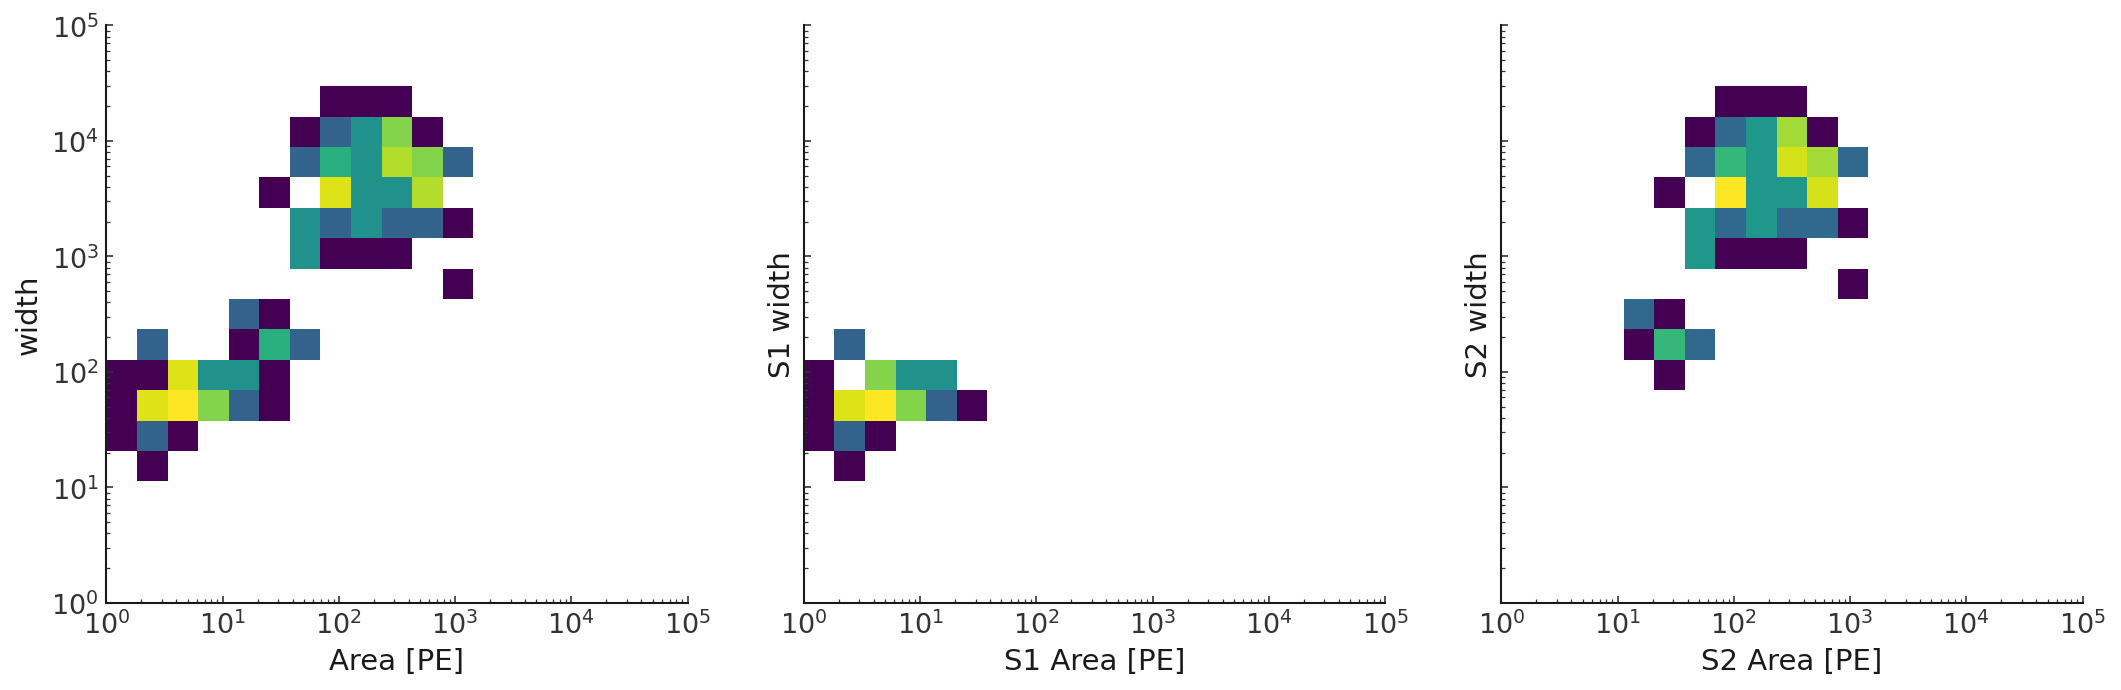

In [28]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(17,5), sharex=True, sharey=True)
ax0.grid(False); ax1.grid(False); ax2.grid(False)
ax0.hist2d(peaks["area"], peaks["range_50p_area"], 
           bins=(np.logspace(0,5,20),np.logspace(0,5,20)),
           norm=LogNorm());
ax0.set_xscale("log"); ax0.set_yscale("log")
ax0.set_xlabel("Area [PE]"); ax0.set_ylabel("width");


ax1.hist2d(peak_s1["area"], peak_s1["range_50p_area"], 
           bins=(np.logspace(0,5,20),np.logspace(0,5,20)),
           norm=LogNorm());
ax1.set_xscale("log"); ax1.set_yscale("log")
ax1.set_xlabel("S1 Area [PE]"); ax1.set_ylabel("S1 width");

ax2.hist2d(peak_s2["area"], peak_s2["range_50p_area"], 
           bins=(np.logspace(0,5,20),np.logspace(0,5,20)),
           norm=LogNorm());
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.set_xlabel("S2 Area [PE]"); ax2.set_ylabel("S2 width");

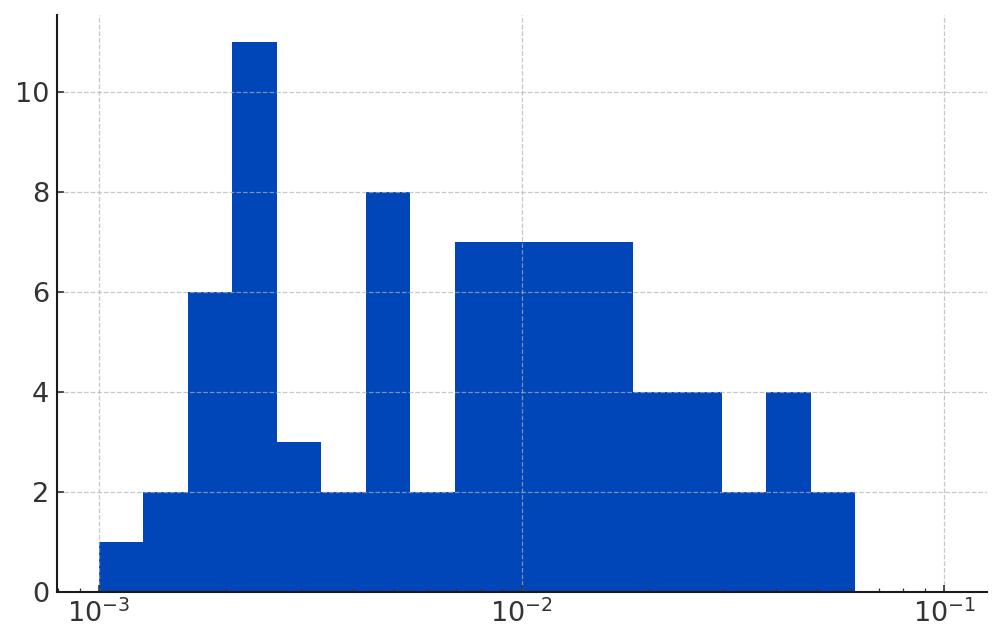

In [29]:
plt.hist((peaks['time']-peaks['time'].min())/np.sum(peaks['time']-peaks['time'].min()), bins=np.logspace(-3,-1,20));
plt.xscale('log')

### Accessing the existing simulated data

While one single realization of a model is useful, in order to optimize the cuts, and study the generic signal characteristics of supernovae, we might want to install many simulations.

In [43]:
# access the simulated data folder and check the saved names
simnames = see_simulated_files(config_file="../simple_config.conf", get_names=True)
simnames

array(['Naka13_i5_b0_000', 'Naka13_i5_b0_001', 'Naka13_i5_b0_002',
       'Naka13_i5_b0_003', 'Naka13_i5_b0_004', 'Naka13_i5_b0_005',
       'Naka13_i5_b0_006', 'Naka13_i5_b0_007', 'Naka13_i5_b0_008',
       'Naka13_i5_b0_009', 'Naka13_i5_b1_000', 'Naka13_i5_b1_001',
       'Naka13_i5_b1_002', 'Naka13_i5_b1_003', 'Naka13_i5_b1_004',
       'Naka13_i5_b1_005', 'Naka13_i5_b1_006', 'Naka13_i5_b1_007',
       'Naka13_i5_b1_008', 'Naka13_i5_b1_009', 'Nakazato2013_i5_000',
       'Nakazato2013_i5_001', 'Nakazato2013_i5_002', 'snsim_test'],
      dtype='<U19')

In [31]:
df = see_simulated_contexts()
df.sample(6)

,name,strax_version,cutax_version,straxen_version,date_added,tag,hash,sim_id
31,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_008
0,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Bollig16_i0_b0_000
30,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i5_b0_007
4,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Bollig16_i0_b0_004
20,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,Naka16_i1_b0_012
38,xenonnt_sim_SR0v4_cmt_v9,1.4.1,1.14.3,2.0.6,2023-04-03 13:33:44.354,ramirezdiego-patch-1,arxbantbgc,SN_Nakazato5_001


Here, as of 11th of April 2023, we have several data for Nakazato 2014 model, and at the index 5. <br>
These simulations are created using the `scripts` which allow to submit batch jobs and simulate many of them in one go. The `b0` and `b1` refers to the submitted batches. In principle, they are all the same model at the same distance, and just different realizations. 

In [33]:
peaks_all = st.get_df(df[df['name']=="xenonnt_sim_SR0v4_cmt_v9"].sim_id, ["peak_basics", "peak_positions"])
peak_s1 = peaks_all[peaks_all['type'] == 1]
peak_s2 = peaks_all[peaks_all['type'] == 2]

Loading 39 runs:   0%|          | 0/39 [00:00<?, ?it/s]

The line `df['name']=="xenonnt_sim_SR0v4_cmt_v9"` ensures that we load data that is simulated with the same context, if we try to add one data that had been simulated with a different context, then wfsim will try to re-simulate it using your current context.

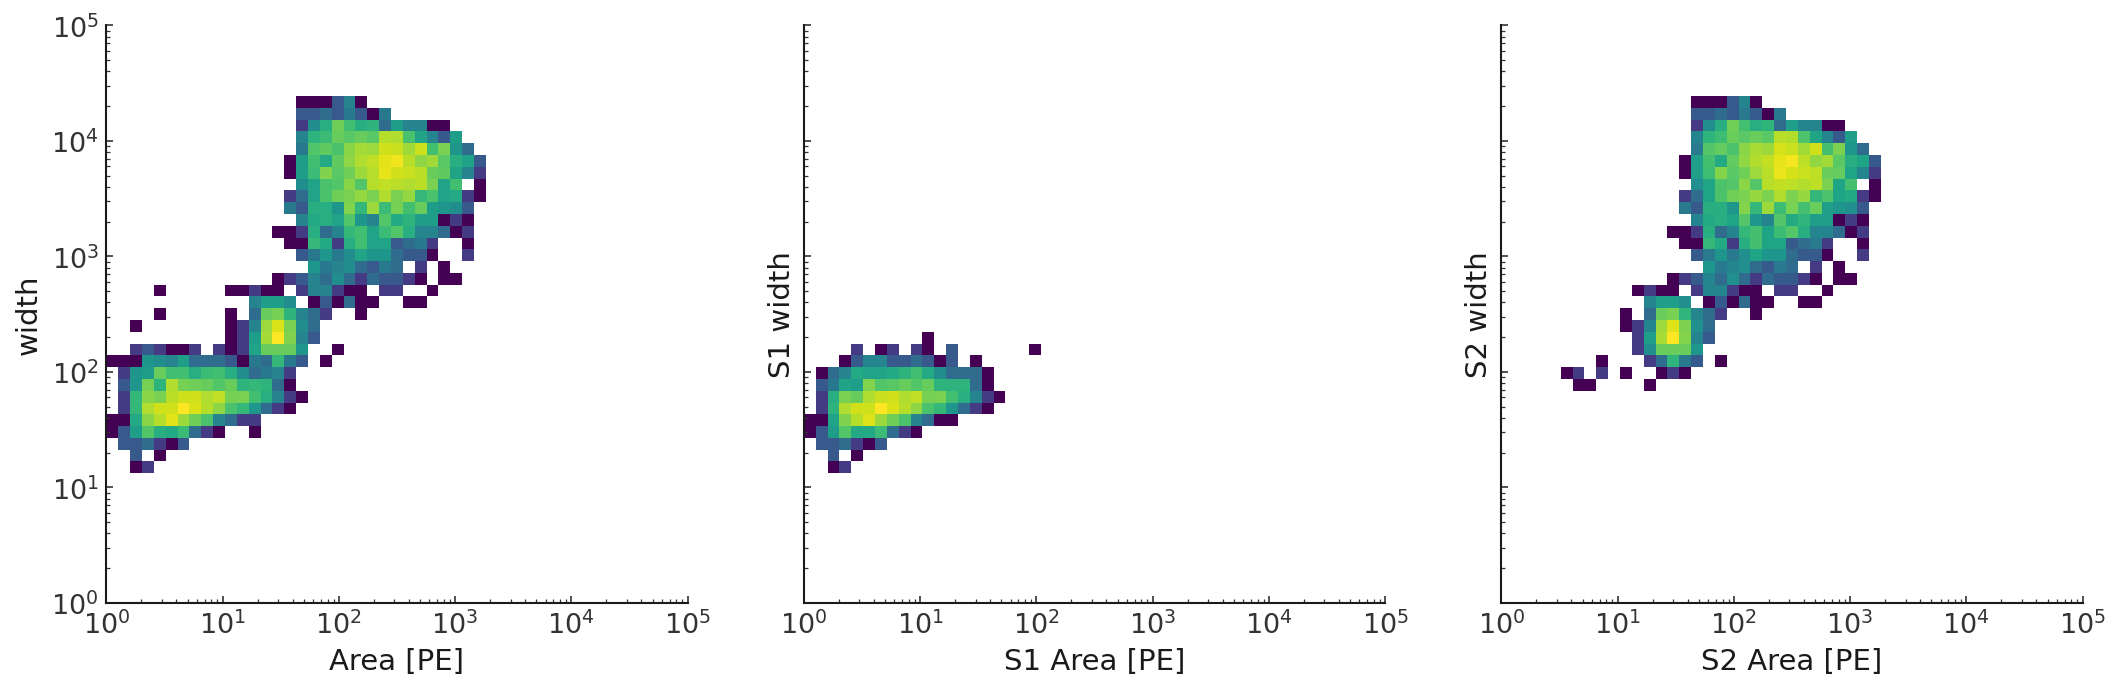

In [35]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(17,5), sharex=True, sharey=True)
ax0.grid(False); ax1.grid(False); ax2.grid(False)
ax0.hist2d(peaks_all["area"], peaks_all["range_50p_area"], 
           bins=(np.logspace(0,5,50),np.logspace(0,5,50)), norm=LogNorm());
ax0.set_xscale("log"); ax0.set_yscale("log")
ax0.set_xlabel("Area [PE]"); ax0.set_ylabel("width");

ax1.hist2d(peak_s1["area"], peak_s1["range_50p_area"], 
           bins=(np.logspace(0,5,50),np.logspace(0,5,50)), norm=LogNorm());
ax1.set_xscale("log"); ax1.set_yscale("log")
ax1.set_xlabel("S1 Area [PE]"); ax1.set_ylabel("S1 width");

ax2.hist2d(peak_s2["area"], peak_s2["range_50p_area"], 
           bins=(np.logspace(0,5,50),np.logspace(0,5,50)), norm=LogNorm());
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.set_xlabel("S2 Area [PE]"); ax2.set_ylabel("S2 width");

### Notes:

When different contexts are used e.g. 
```python
st1 = cutax.contexts.xenonnt_sim_SR0dev_cmt_v9()
st2 = cutax.contexts.xenonnt_sim_SR0v4_cmt_v9()
```
the simulated data differs, this lineage is added to the end of the data e.g.
```bash
snsim_test-raw_records-arxbantbgc
snsim_test-raw_records-p5cvhlngqr 
```
So the `runid`s still remain the same `snsim_test`. However, it will fetch one or the other depending on your current context. So make sure the simulated data and current context are the same. <br>

Notice that even if you are using a given context, if you changed one of the software versions e.g. manually installed cutax from the source and upgraded/downgraded, then the lineage changes again and you won't be able to retrieve the same data. In which case wfsim will start re-simulating again for the given context.